In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def normalized_histogram(img):
  H = np.zeros((256))
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      H[img[i,j]] += 1
  H = H/(img.shape[0]*img.shape[1])
  return H

def equalize(img):
  h = normalized_histogram(img)
  A = np.zeros((256))
  A[0] = h[0]
  for i in range(1, 256):
    A[i] = A[i-1] + h[i]
  Out = np.zeros(img.shape)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      Out[i,j] = A[img[i,j]]
  return (255*Out).astype('uint8')

def equalize_adaptative(img):
  out = np.zeros(img.shape)
  m = img[0].size
  n = img.size//m
  x = n//8
  y = m//8
  for i in range(x):
    for j in range(y):
      sub = img[i*x:i*x+x,j:j*y+y]
      sub = equalize(sub)
      out[i*x:i*x+x,j:j*y+y] = sub
  return out

def filtering(image, mask):
  shift_row = mask.shape[0]//2
  shift_col = mask.shape[1]//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      result[i,j] = np.sum(aux*mask)
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]
def filtroMediana(image, size):
  shift_row = size//2
  shift_col = size//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      val = np.sort(aux, axis=None)
      result[i,j] = val[(size**2)//2]
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

# PRACTICA 1

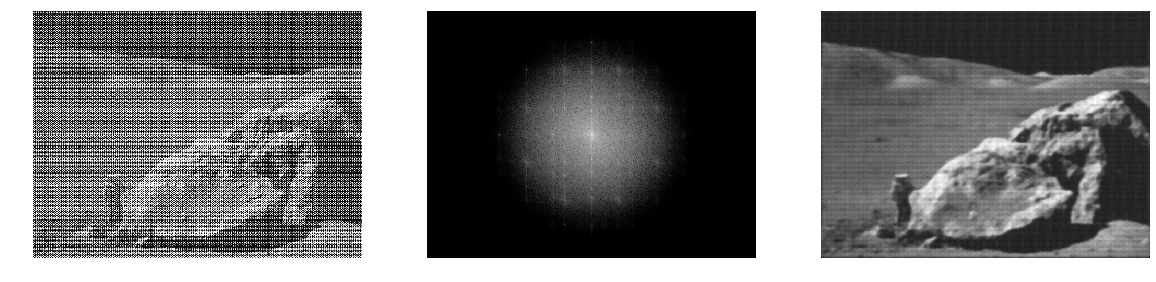

In [0]:
img = cv2.imread("MHcHVmX.png", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = [rows//2, cols//2]

ref = (np.median(fshift)+np.max(fshift))/2
# ref = (np.median(fshift))

mask = np.zeros((rows, cols))
desv = 80

for i in range(rows):
  for j in range(cols):
    
    mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )**2 ## **2
    if 40 < np.sqrt((crow-i)**2 + (ccol-j)**2):
      if ref <= fshift[i, j]:
        mask[i, j] *= 0.25

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

###
img_back = filtroMediana(img_back**2, 5)
###


plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()

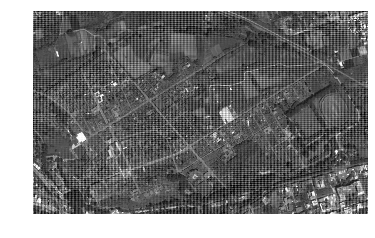

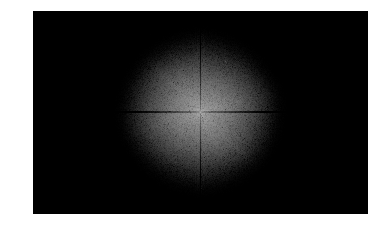

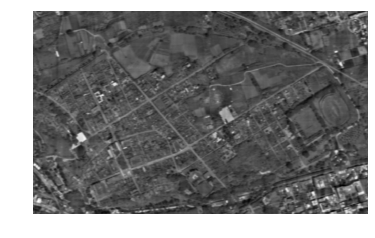

In [0]:
img = cv2.imread("aerialpompeiiperiodic.jpg", 0)
img = filtroMediana(img, 3)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols))

desv = 100
for i in range(0, rows):
  for j in range(0, cols):
    if j in range(cols//2-3, cols//2+3) or i in range(rows//2-3, rows//2+3):
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) ) / (np.sqrt((i-crow)**2+(j-ccol)**2)+0.1)
    else:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

plt.axis("off")
plt.imshow(magnitud, cmap="gray")
plt.show()

plt.axis("off")
plt.imshow(img_back, cmap="gray")
plt.show()

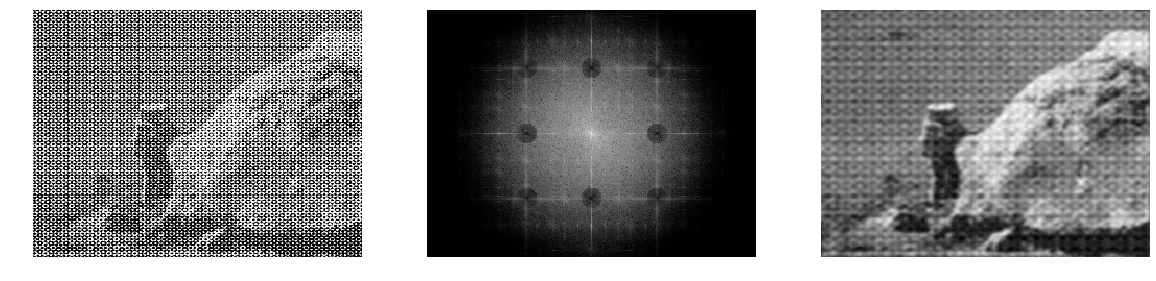

In [0]:
img = cv2.imread("i7w0S.png", 0)
# img = filtroMediana(img, 3)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = [rows//2, cols//2]
points = [
    [55,95,10,2], # ARRIBA IZQUIERDA
    [180,220,10,2], # ABAJO DERECHA
    [55,220,10,2], # ARRIBA DERECHA
    [180,95,10,2], # ABAJO IZQUIERDA
    [crow,95,10,1.5], # CENTRO IZQUIERDA
    [crow,220,10,1.5], # CENTRO DERECHA
    [55,ccol,10,1.5], # ARRIBA CENTRO
    [180,ccol,10,1.5], # ABAJO CENTRO
]

maxdist = np.sqrt(ccol**2+crow**2)
mask = np.zeros((rows, cols))
desv = 40

for i in range(rows):
  for j in range(cols):
    
    cond = True
    for x,y,d,p in points:
      if np.sqrt((x-i)**2 + (y-j)**2) < d:
        mask[i, j] = (np.sqrt((x-i)**2 + (y-j)**2)/maxdist)**p
        cond = False
    if cond:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()

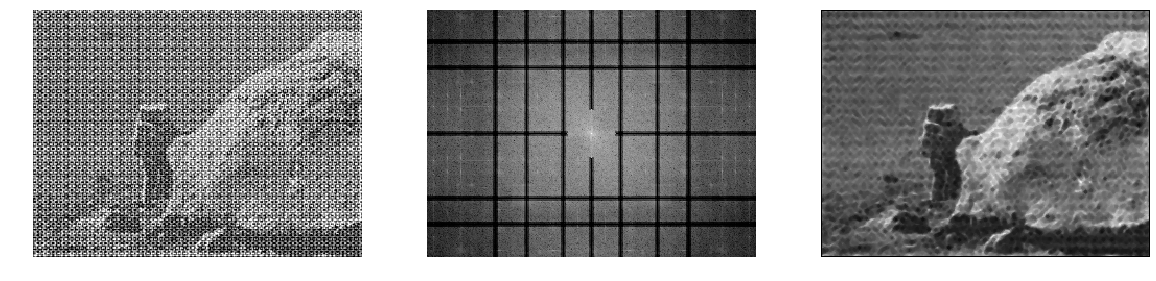

In [0]:
img = cv2.imread("i7w0S.png", 0)

img = filtering(img, 1/9+np.zeros((3,3)))
img = filtroMediana(img, 1)

mask = np.zeros((3, 3))
mask[0,1] = mask[2,1] = mask[1,0] = mask[1,2] = 1
mask[1,1] = -4

laplacian = filtering(img, mask)
out = img - laplacian
np.clip(out, 0, 255, out=out)
img = out.astype('uint8')

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = [rows//2, cols//2]

mask = np.zeros((rows, cols))
desv = 80

lrows = [30,55,180,205]
lcols = [65,95,130,185,220,250]
# lrows = [55,69,166,180]
# lcols = [65,80,95,220,235,250]

d = 3

for i in range(rows):
  for j in range(cols):
    
    mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )
    for l in lrows:
      if abs(i-l) < d:
        mask[i, j] *= abs(i-l)/ccol
    for l in lcols:
      if abs(j-l) < d:
        mask[i, j] *= abs(j-l)/crow
    
    if np.sqrt((crow-i)**2 + (ccol-j)**2) > 23:
      if abs(i-crow) < d:
        mask[i, j] *= abs(i-crow)/crow
      elif abs(j-ccol) < d:
        mask[i, j] *= abs(j-ccol)/ccol

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

###
img_back = filtroMediana(img_back**2, 2)
###

plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()

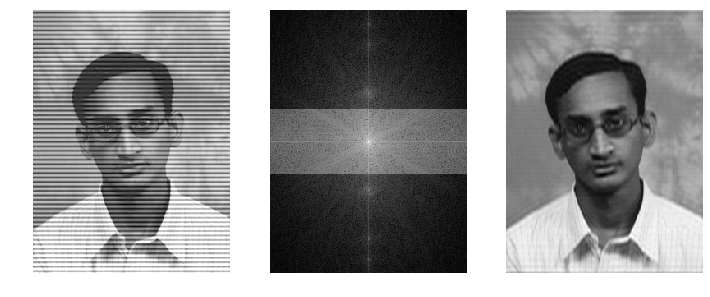

In [0]:
img = cv2.imread("oIumJ.png", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols))

desv = 18000
cdif = 0
rdif = 40
for i in range(rows):
  for j in range(cols):
    if i in range(crow-rdif, crow+rdif) or j in range(ccol-cdif, ccol+cdif):
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )
    else:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) ) / (np.sqrt((i-crow)**2+(j-ccol)**2)+0.1)

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()

# PRACTICA 2

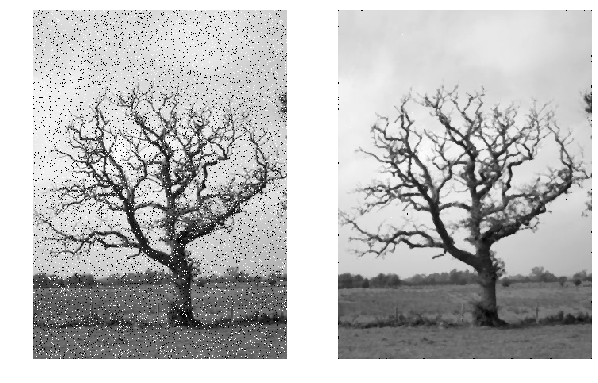

In [0]:
img = cv2.imread("Arbol.jpg", 0)
res = filtroMediana(img, 3)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

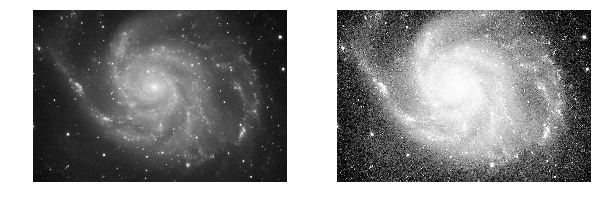

In [0]:
img = cv2.imread("Galaxia.jpg", 0)

mask = np.zeros((3, 3))
mask[0,1] = mask[2,1] = mask[1,0] = mask[1,2] = 1
mask[1,1] = -4

laplacian = filtering(img, mask)
out = img - laplacian
np.clip(out, 0, 255, out=out)
res = out.astype('uint8')
res = equalize(res)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


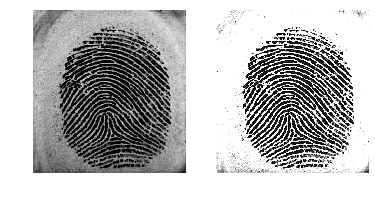

In [0]:
img = cv2.imread("huella_1.jpg", 0)

res = filtering(img, 1/9+np.zeros((3, 3)))
res = filtroMediana(img, 3)

mask = np.zeros((3, 3))
mask[0,1] = mask[2,1] = mask[1,0] = mask[1,2] = 1
mask[1,1] = -4

laplacian = filtering(res, mask)
out = res - laplacian
np.clip(out**1.15, 0, 255, out=out)
res = out.astype('uint8')

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

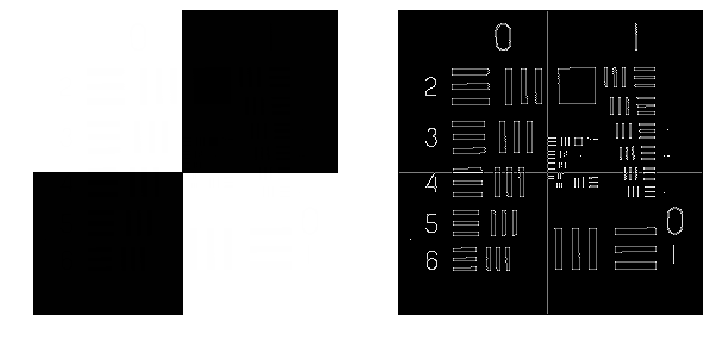

In [0]:
img = cv2.imread("incognita1.tif", 0)

res = equalize(img)

mask = np.zeros((3, 3))
mask[0,1] = mask[2,1] = mask[1,0] = mask[1,2] = 1
mask[1,1] = -4

out = filtering(res, mask)
np.clip(out, 0, 255, out=out)
res = out.astype('uint8')

plt.figure(figsize=(12, 12))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")

plt.show()

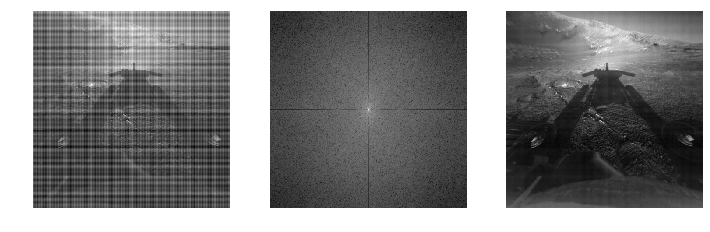

In [0]:
img = cv2.imread("MarteC.jpeg", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols))

desv = min(crow, ccol)
for i in range(0, rows):
  for j in range(0, cols):
    if i == crow or j == ccol:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) ) / (np.sqrt((i-crow)**2+(j-ccol)**2)+0.1)
    else:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()

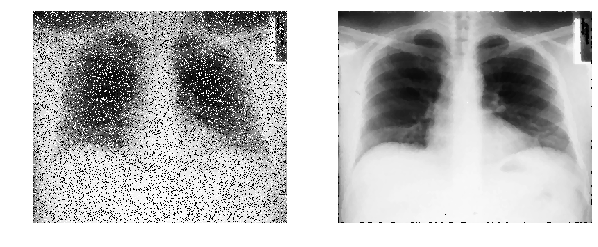

In [0]:
img = cv2.imread("Radiografia.jpg", 0)

res = filtroMediana(img, 3)
res = filtroMediana(res, 3)
res = filtroMediana(res, 3)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

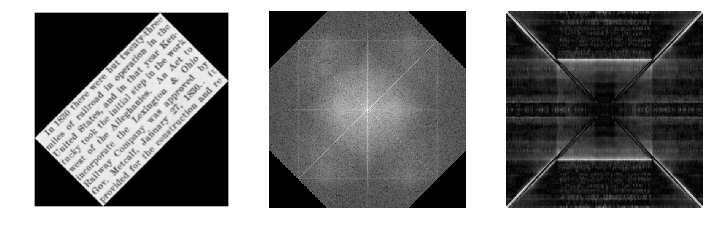

In [245]:
from math import sin, cos, asin, acos, sqrt

img = cv2.imread("Texto.jpg", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

fshift2 = fshift.copy() * 0.0

def dist(a,b,x,y):
  return sqrt((a-x)**2+(b-y)**2)

rot = 3*pi/4

for y in range(rows):
  for x in range(cols):
    
    i = x - ccol
    j = y - crow
    
    r = dist(0,0,i,j) + 1e-20
    
    o = acos(i/r)
    x2 = round(r*cos(o + rot)) + ccol - 1
    y2 = round(r*sin(o + rot)) + crow - 1
    
    if x2 in range(cols) and y2 in range(rows):
      fshift2[y, x] = fshift[y2, x2]

fshift = fshift2.copy()

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()